<a href="https://colab.research.google.com/github/BigDaa007/Machine-learning-essentials/blob/main/01%20Linear%20Regression/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use("seaborn")

# Generating Data

In [4]:
# Data Generate X,Y
def generateDataset(m):
    X = np.random.randn(m)*10
    noise = np.random.randn(m)
    y = 3*X + 1 + 5*noise
    return X,y

In [5]:
X,y = generateDataset(100)
print(X.shape,y.shape)

(100,) (100,)


# Plotting our data

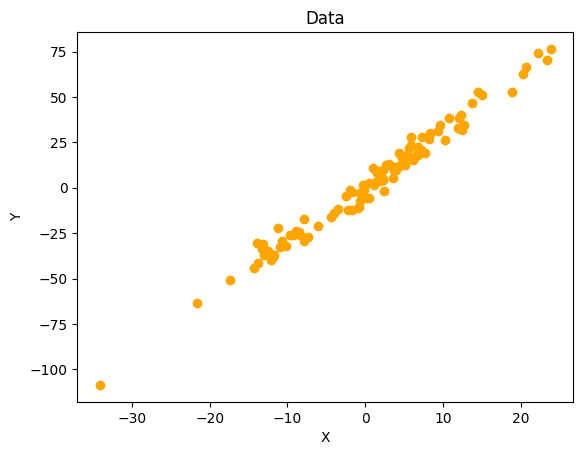

In [6]:
def plotData(X,y,color="orange",title="Data"):
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.scatter(X,y,c=color)
    plt.show()

plotData(X,y)

# Normalization of Data

In [7]:
def normaliseData(X):
    X = (X-X.mean())/X.std()
    return X

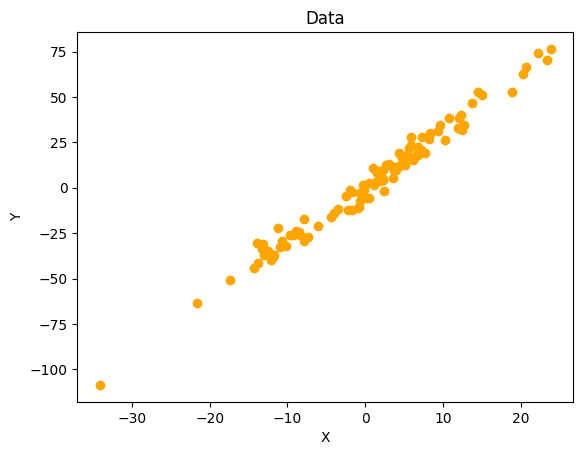

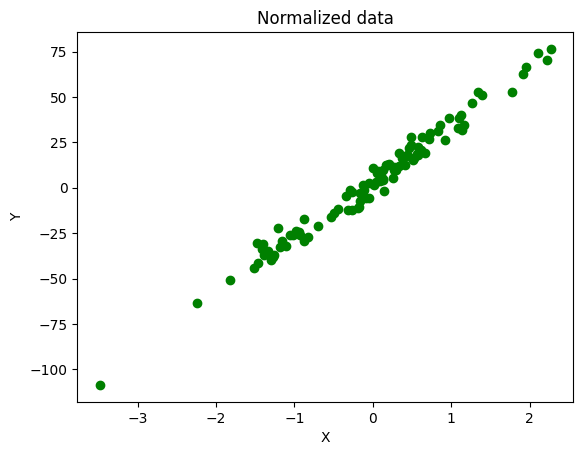

In [8]:
plotData(X,y)
X = normaliseData(X)
plotData(X,y,"Green","Normalized data")

# Train Test Split

In [9]:
def trainTestSplit(X,y, split=0.8):
    m = X.shape[0]
    data = np.zeros((m,2))

    data[:,0] = X
    data[:,1] = y

    np.random.shuffle(data)

    split = int(m*split)

    XT = data[:split,0]
    yT = data[:split,1]

    Xt = data[split: ,0]
    yt = data[split: ,1]

    return XT,yT,Xt,yt


In [10]:
XT,yT,Xt,yt = trainTestSplit(X,y)

In [11]:
print(XT.shape,yT.shape)
print(Xt.shape,yt.shape)

(80,) (80,)
(20,) (20,)


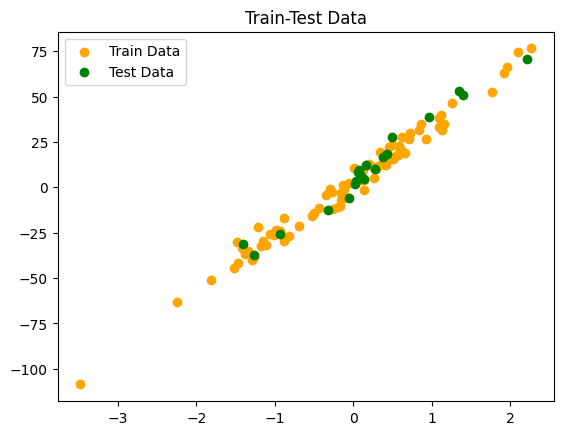

In [12]:
plt.scatter(XT,yT,color='orange',label="Train Data")
plt.scatter(Xt,yt,color='green',label="Test Data")
plt.title("Train-Test Data")
plt.legend()
plt.show()

# Data Modelling

In [13]:
# Modelling
def hypothesis(X,theta):
    return theta[0] + theta[1]*X

def error(X,y,theta):
    m = X.shape[0]
    e = 0
    for i in range(m):
        y_i = hypothesis(X[i],theta)
        e = e + (y[i] - y_i)**2

    return e/(2*m)

def gradient(X,y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))

    for i in range(m):
        exp = hypothesis(X[i],theta) - y[i]
        grad[0] += (exp)
        grad[1] += (exp)*X[i]

    return grad/m


def train(X,y,learning_rate = 0.1,maxItrs = 100):
    theta = np.zeros((2,))
    error_list = []

    for i in range(maxItrs):
        grad = gradient(X,y,theta)
        error_list.append(error(X,y,theta))
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]

    plt.xlabel("Iteration Number")
    plt.ylabel("Loss")
    plt.plot(error_list)
    return theta

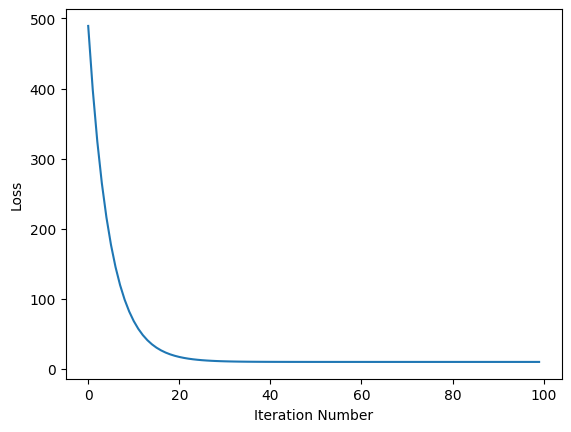

In [14]:
theta = train(X,y)

In [15]:
theta

array([ 3.58923416, 30.7538243 ])

In [16]:
def predict(X,theta):
    return hypothesis(X,theta)

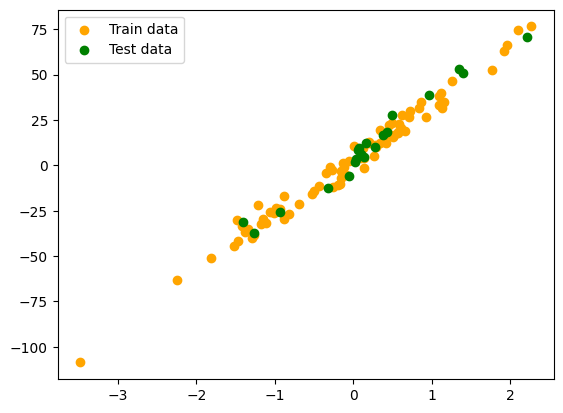

In [17]:
plt.scatter(XT,yT,color='orange',label='Train data')
plt.scatter(Xt,yt,color='green',label='Test data')
plt.legend()
plt.show()

In [18]:
yp = predict(Xt,theta)

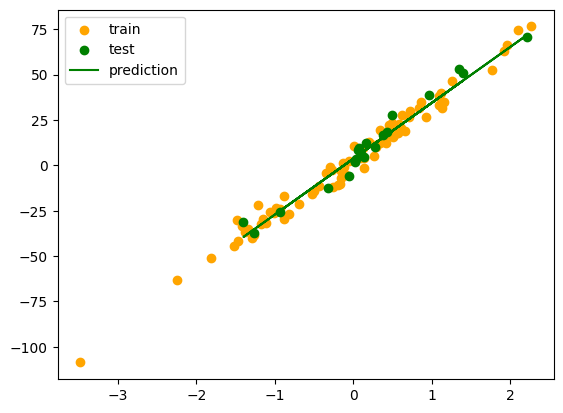

In [19]:
plt.scatter(XT,yT,color='orange',label="train")
plt.scatter(Xt,yt,color='green',label="test")
plt.plot(Xt,yp,color='green',label="prediction")
plt.legend()
plt.show()

# Model Evaluation

In [20]:
# Model Evaluation
def r2Score(y,yp):
    ymean = y.mean()
    num = np.sum((y-yp)**2)
    denom = np.sum((y - ymean)**2)
    return 1 - num/denom

r2Score(yt,yp)

0.9705019473239513

## Error while using below code:
axes = fig.gca(projection='3d')

The error you're encountering, `TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'`, is due to a change in Matplotlib's API. In versions of Matplotlib **3.4 and later**, the `gca()` method no longer accepts keyword arguments¹²³⁴.

To fix this error, you should replace the line:
```python
axes = fig.gca(projection='3d')
```
with:
```python
axes = fig.add_subplot(111, projection='3d')
```
This change will create a 3D subplot on your figure and should resolve the issue you're facing. The `add_subplot` method is the correct way to add a new axes to a figure with specific properties, including the 3D projection¹²³⁴.

Here's a complete example of how you can create a 3D plot in Matplotlib:
```python
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')

# Your 3D plotting code goes here

plt.show()
```
Make sure to run this code in a cell in your Google Colab notebook. If you have any more questions or need further assistance, feel free to ask!

Source: Conversation with Copilot, 22/5/2024
(1) TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'. https://stackoverflow.com/questions/76047803/typeerror-figurebase-gca-got-an-unexpected-keyword-argument-projection.
(2) gca and latest version of Matplotlib - Stack Overflow. https://stackoverflow.com/questions/67095247/gca-and-latest-version-of-matplotlib.
(3) (Fixed) TypeError: FigureBase.gca() got an unexpected keyword argument .... https://www.pythonreader.com/2023/07/fixed-typeerror-figurebasegca-got.html.
(4) (Fixed) TypeError: FigureBase.gca() got an unexpected keyword argument .... https://blog.finxter.com/fixed-typeerror-figurebase-gca-got-an-unexpected-keyword-argument-projection/.
(5) 【错误解决方案】TypeError: gca() got an unexpected keyword argument ‘projection .... https://blog.csdn.net/m0_72676510/article/details/134077412.

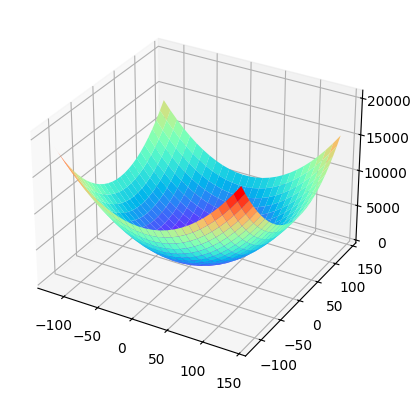

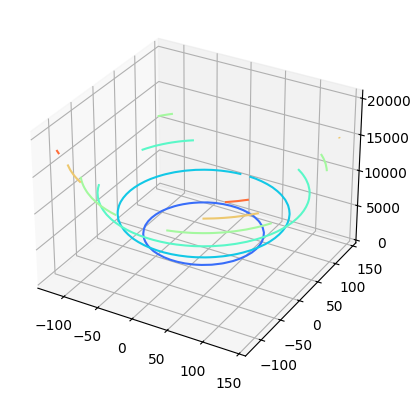

In [35]:
# Visualising the training process
T0 = np.arange(-120,150,10)
T1 = np.arange(-120,150,10)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        yp = T1[i,j]*X + T0[i,j]
        J[i,j] = np.mean((y-yp)**2)/2


fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()


In [27]:
# Trace the trajectory of gradient
def train(X,y,learning_rate = 0.1,maxItrs = 100):
    theta = np.array([-150,100])
    error_list = []
    # note down values of theta
    theta_list = []

    for i in range(maxItrs):
        grad = gradient(X,y,theta)
        error_list.append(error(X,y,theta))
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]

    return theta, theta_list, error_list


In [28]:
theta, theta_list, error_list = train(XT,yT)

In [29]:
theta_list = np.array(theta_list)

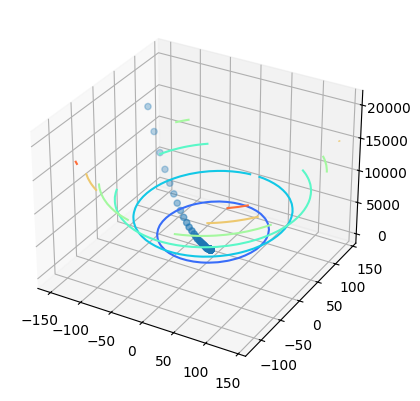

In [32]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0], theta_list[:,1],error_list)
plt.show()

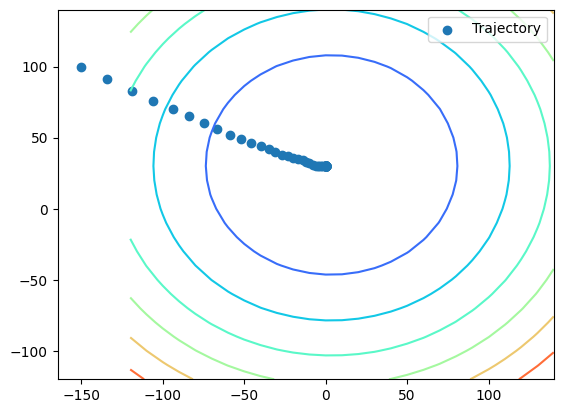

In [31]:
# 2D Contour Plot (Top View)
plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1],label='Trajectory')
plt.legend()
plt.show()